In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import svm
from itertools import product

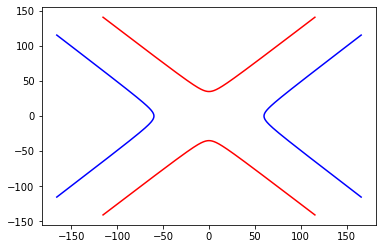

In [2]:
N, h, k, a, b = 2000, 50, 25, 10, 10
N_h = N//2

t = np.linspace(-np.pi, np.pi, N_h)
#t = np.concatenate((t, np.array([-i for i in range(1, N_h//2+1)])*2*np.pi/(N_h//2)), axis=0)
t = np.reshape(t,(N_h, 1))


plt.plot(h + a * np.cosh(t), b * np.sinh(t), 'b')
plt.plot(-(h + a * np.cosh(t)), b * np.sinh(t), 'b')
plt.plot(a * np.sinh(t), k + b * np.cosh(t), 'r')
plt.plot(a * np.sinh(t), -(k + b * np.cosh(t)), 'r')
plt.show()

In [3]:
sig1, sig2 = 10, 10
x_1 = np.array([sig1*np.random.randn(N_h,1) + (h + a * np.cosh(t)), sig1*np.random.randn(N_h,1) + (b * np.sinh(t))])
x_2 = np.array([sig1*np.random.randn(N_h,1) - (h + a * np.cosh(t)), sig1*np.random.randn(N_h,1) + (b * np.sinh(t))])

X = np.reshape(np.concatenate((x_1, x_2), axis=1), (2, 2000)).T

y_1 = np.array([sig2*np.random.randn(N_h,1) + (a * np.sinh(t)), sig2*np.random.randn(N_h,1) + (k + b * np.cosh(t))])
y_2 = np.array([sig2*np.random.randn(N_h,1) + (a * np.sinh(t)), sig2*np.random.randn(N_h,1) - (k + b * np.cosh(t))])

Y = np.reshape(np.concatenate((y_1, y_2), axis=1), (2, 2000)).T

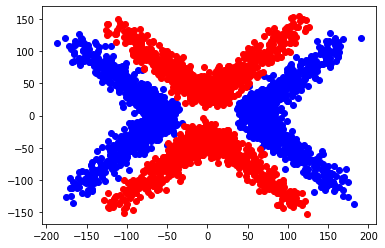

In [4]:
plt.plot(X[:,0], X[:,1], 'bo', Y[:,0], Y[:,1], 'ro')
plt.show()

In [5]:
# x , y data points
z1 = np.concatenate((X, Y), axis=0)
# targets for data points 
target = np.concatenate((np.ones(X.shape[0]), -1*np.ones(Y.shape[0])), axis=0)
shuff = np.arange(z1.shape[0])
np.random.shuffle(shuff)
z1_shuff = z1[shuff]
target_shuff = target[shuff]
print(z1.shape, target.shape)

(4000, 2) (4000,)


Accuracy: 0.64375
[[1581  419]
 [1006  994]]
F1 score: 0.5824787576911807


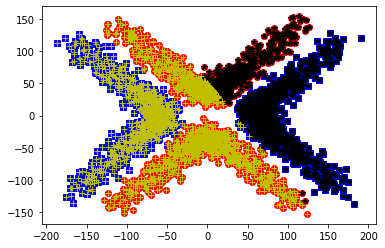

In [10]:
kf = KFold(n_splits=10)
t = 0
for train, test in kf.split(z1):
    lda = LinearDiscriminantAnalysis()
    lda.fit(z1_shuff[train], target_shuff[train])
    acc = lda.score(z1_shuff[test], target_shuff[test])
    if(acc > t):
        t = acc
        LDA = lda
        
lda_prd = LDA.predict(z1_shuff)

print("Accuracy: %s" % (LDA.score(z1_shuff, target_shuff.ravel())))
print(confusion_matrix(target_shuff, lda_prd))
print("F1 score: %s" % f1_score(target_shuff, lda_prd))

lda_pred1 = np.array([z1_shuff[i] for i in range(len(lda_prd)) if lda_prd[i] == 1])
lda_pred2 = np.array([z1_shuff[i] for i in range(len(lda_prd)) if lda_prd[i] == -1])

plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
plt.plot(lda_pred1[:,0], lda_pred1[:,1], 'k*', lda_pred2[:,0], lda_pred2[:,1], 'y+')
plt.show()

Accuracy: 0.9845
[[1975   25]
 [  37 1963]]
F1 score: 0.5824787576911807


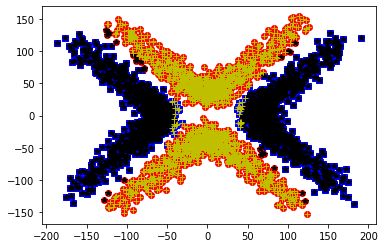

In [7]:
t = 0
for train, test in kf.split(z1):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(z1_shuff[train], target_shuff[train])
    acc = qda.score(z1_shuff[test], target_shuff[test])
    if(acc > t):
        t = acc
        QDA = qda
        
qda_prd = QDA.predict(z1_shuff)

print("Accuracy: %s" % (QDA.score(z1_shuff, target_shuff.ravel())))
print(confusion_matrix(target_shuff, qda_prd))
print("F1 score: %s" % f1_score(target_shuff, lda_prd))

qda_pred1 = np.array([z1_shuff[i] for i in range(len(qda_prd)) if qda_prd[i] == 1])
qda_pred2 = np.array([z1_shuff[i] for i in range(len(qda_prd)) if qda_prd[i] == -1])

plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
plt.plot(qda_pred1[:,0], qda_pred1[:,1], 'k*', qda_pred2[:,0], qda_pred2[:,1], 'y+')
plt.show()

Accuracy: 0.99825
[[1999    1]
 [   6 1994]]
F1 score: 0.9982478097622026


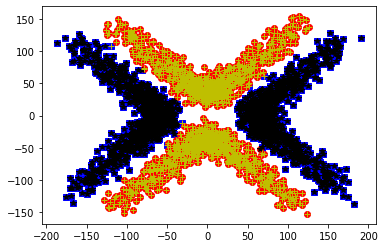

In [8]:
t = 0
for train, test in kf.split(z1):
    g_svm = svm.SVC(C=0.4, gamma='scale')
    g_svm.fit(z1_shuff[train], target_shuff[train])
    acc = g_svm.score(z1_shuff[test], target_shuff[test])
    if(acc > t):
        t = acc
        G_SVM = g_svm
        
g_svm_prd = G_SVM.predict(z1_shuff)

print("Accuracy: %s" % (G_SVM.score(z1_shuff, target_shuff)))
print(confusion_matrix(target_shuff, g_svm_prd))
print("F1 score: %s" % f1_score(target_shuff, g_svm_prd))

g_svm_pred1 = np.array([z1_shuff[i] for i in range(len(g_svm_prd)) if g_svm_prd[i] == 1])
g_svm_pred2 = np.array([z1_shuff[i] for i in range(len(g_svm_prd)) if g_svm_prd[i] == -1])

plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
plt.plot(g_svm_pred1[:,0], g_svm_pred1[:,1], 'k*', g_svm_pred2[:,0], g_svm_pred2[:,1], 'y+')
plt.show()

Accuracy: 0.9975
[[1997    3]
 [   7 1993]]
F1 score: 0.9974974974974976


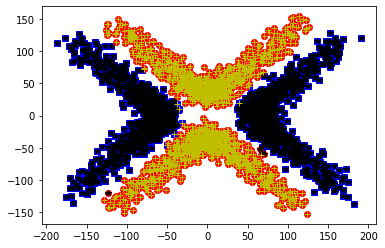

In [9]:
t = 0
for train, test in kf.split(z1):
    p_svm = svm.SVC(C=0.1, kernel='poly', gamma='scale', degree=2)
    p_svm.fit(z1_shuff[train], target_shuff[train])
    acc = p_svm.score(z1_shuff[test], target_shuff[test])
    if(acc > t):
        t = acc
        P_SVM = p_svm
        
p_svm_prd = P_SVM.predict(z1_shuff)

print("Accuracy: %s" % (P_SVM.score(z1_shuff, target_shuff)))
print(confusion_matrix(target_shuff, p_svm_prd))
print("F1 score: %s" % f1_score(target_shuff, p_svm_prd))

p_svm_pred1 = np.array([z1_shuff[i] for i in range(len(p_svm_prd)) if p_svm_prd[i] == 1])
p_svm_pred2 = np.array([z1_shuff[i] for i in range(len(p_svm_prd)) if p_svm_prd[i] == -1])

plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
plt.plot(p_svm_pred1[:,0], p_svm_pred1[:,1], 'k*', p_svm_pred2[:,0], p_svm_pred2[:,1], 'y+')
plt.show()

In [14]:
x1_min, x1_max = np.min(z1[:, 0]) - 1, np.max(z1[:, 0]) + 1
x2_min, x2_max = np.min(z1[:, 1]) - 1, np.max(z1[:, 1]) + 1

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

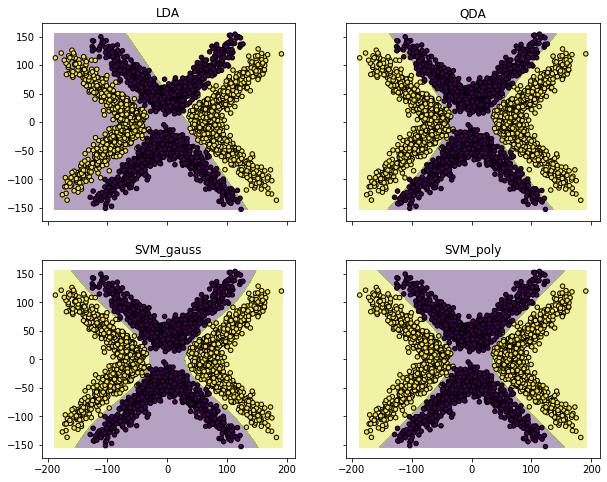

In [16]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [LDA, QDA, G_SVM, P_SVM],
                        ['LDA', 'QDA', 'SVM_gauss', 'SVM_poly']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(z1[:, 0], z1[:, 1], c = target, s = 20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

In [ ]:
# # LDA - No 10 fold
# lda = LinearDiscriminantAnalysis()
# lda.fit(z1_shuff, target_shuff)
# lda_prd = lda.predict(z1_shuff)

# print("Accuracy: %s" % (lda.score(z1_shuff, target_shuff.ravel())))
# print(confusion_matrix(target_shuff, lda_prd))
# print("F1 score: %s" % f1_score(target_shuff, lda_prd))

# lda_pred1 = np.array([z1_shuff[i] for i in range(len(lda_prd)) if lda_prd[i] == 1])
# lda_pred2 = np.array([z1_shuff[i] for i in range(len(lda_prd)) if lda_prd[i] == -1])

# plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
# plt.plot(lda_pred1[:,0], lda_pred1[:,1], 'k*', lda_pred2[:,0], lda_pred2[:,1], 'y+')
# plt.show()

# # QDA - No 10 fold
# qda = QuadraticDiscriminantAnalysis()
# qda.fit(z1_shuff, target_shuff)
# qda_prd = qda.predict(z1_shuff)

# print("Accuracy: %s" % (qda.score(z1_shuff, target_shuff.ravel())))
# print(confusion_matrix(target_shuff, qda_prd))
# print("F1 score: %s" % f1_score(target_shuff, qda_prd))

# qda_pred1 = np.array([z1_shuff[i] for i in range(len(qda_prd)) if qda_prd[i] == 1])
# qda_pred2 = np.array([z1_shuff[i] for i in range(len(qda_prd)) if qda_prd[i] == -1])

# plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
# plt.plot(qda_pred1[:,0], qda_pred1[:,1], 'k*', qda_pred2[:,0], qda_pred2[:,1], 'y+')
# plt.show()

# # SVM Gaussian Kernel - No 10 fold
# g_svm = svm.SVC(C=0.4, gamma='scale')
# g_svm.fit(z1_shuff, target_shuff)
# g_svm_prd = g_svm.predict(z1_shuff)

# print("Accuracy: %s" % (g_svm.score(z1_shuff, target_shuff)))
# print(confusion_matrix(target_shuff, g_svm_prd))
# print("F1 score: %s" % f1_score(target_shuff, g_svm_prd))

# g_svm_pred1 = np.array([z1_shuff[i] for i in range(len(g_svm_prd)) if g_svm_prd[i] == 1])
# g_svm_pred2 = np.array([z1_shuff[i] for i in range(len(g_svm_prd)) if g_svm_prd[i] == -1])

# plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
# plt.plot(g_svm_pred1[:,0], g_svm_pred1[:,1], 'k*', g_svm_pred2[:,0], g_svm_pred2[:,1], 'y+')
# plt.show()

# # SVM Polynomial kernel - No 10 fold
# p_svm = svm.SVC(C=0.1, kernel='poly', gamma='scale', degree=2)
# p_svm.fit(z1_shuff, target_shuff)
# p_svm_prd = p_svm.predict(z1_shuff)

# print("Accuracy: %s" % (p_svm.score(z1_shuff, target_shuff)))
# print(confusion_matrix(target_shuff, p_svm_prd))
# print("F1 score: %s" % f1_score(target_shuff, p_svm_prd))

# p_svm_pred1 = np.array([z1_shuff[i] for i in range(len(p_svm_prd)) if p_svm_prd[i] == 1])
# p_svm_pred2 = np.array([z1_shuff[i] for i in range(len(p_svm_prd)) if p_svm_prd[i] == -1])

# plt.plot(X[:,0], X[:,1], 'bs', Y[:,0], Y[:,1], 'ro')
# plt.plot(p_svm_pred1[:,0], p_svm_pred1[:,1], 'k*', p_svm_pred2[:,0], p_svm_pred2[:,1], 'y+')
# plt.show()